## 0. code idea

In [1]:
"""
list_of_dates = ['2019-11-20', '2020-01-02', '2020-02-05','2020-03-10','2020-04-16','2020-05-01']
employees=['Hisila', 'Shristi','Zeppy','Alina','Jerry','Kevin']
salary=[200,400,300,500,600,300]

df = pd.DataFrame({"Name":employees,'Joined date': pd.to_datetime(list_of_dates),"Salary":salary})
df = df.set_index(['Joined date'])

filtered_df=df.loc['2019-06-1':'2020-02-05']
print(filtered_df)
"""

'\nlist_of_dates = [\'2019-11-20\', \'2020-01-02\', \'2020-02-05\',\'2020-03-10\',\'2020-04-16\',\'2020-05-01\']\nemployees=[\'Hisila\', \'Shristi\',\'Zeppy\',\'Alina\',\'Jerry\',\'Kevin\']\nsalary=[200,400,300,500,600,300]\n\ndf = pd.DataFrame({"Name":employees,\'Joined date\': pd.to_datetime(list_of_dates),"Salary":salary})\ndf = df.set_index([\'Joined date\'])\n\nfiltered_df=df.loc[\'2019-06-1\':\'2020-02-05\']\nprint(filtered_df)\n'

# 1. 초안

### csv 파일을 불러와, 여러 정보를 띄울 수 있도록 하자.

In [1]:
import pandas as pd

In [2]:
data_csv = pd.read_csv("./Data_example_2.csv")

In [3]:
data_csv.head(5)

,num,Order date,ID,Name,Order,Age,Respiration rate
0,1,2021-10-12,P803165,a,j,56,18
1,2,2021-10-12,P803384,b,k,44,15
2,3,2021-10-13,P805062,c,l,67,17
3,4,2021-10-13,P813347,d,m,12,24
4,5,2021-10-13,P813449,e,n,20,23


## 날짜를 기반으로 특정 날짜만 띄울 수 있도록 하자

In [4]:
data_csv["Order date"]

0    2021-10-12
1    2021-10-12
2    2021-10-13
3    2021-10-13
4    2021-10-13
5    2021-10-14
6    2021-10-15
7    2021-10-15
8    2021-10-15
Name: Order date, dtype: object

In [5]:
a = len(data_csv["num"])

In [6]:
data_list = []

for i in range(a):
    data_list.append( int(data_csv["Order date"][i][-2:]) )

In [7]:
data_list

[12, 12, 13, 13, 13, 14, 15, 15, 15]

In [10]:
data_csv_2 = data_csv.set_index(['Order date'])

b = data_csv_2.loc['2021-10-12':'2021-10-14']

b

,num,ID,Name,Order,Age,Respiration rate
Order date,,,,,,
2021-10-12,1,P803165,a,j,56,18
2021-10-12,2,P803384,b,k,44,15
2021-10-13,3,P805062,c,l,67,17
2021-10-13,4,P813347,d,m,12,24
2021-10-13,5,P813449,e,n,20,23
2021-10-14,6,P815471,f,o,64,11


In [11]:
test = pd.read_csv("./Data_example_3.csv")

In [15]:
test

,num,Order date,ID,Name,Order,Age,Respiration rate
0,1,2021/10/12,P803165,a,j,56,18
1,2,2021/10/12,P803384,b,k,44,15
2,3,2021/10/13,P805062,c,l,67,17
3,4,2021/10/13,P813347,d,m,12,24
4,5,2021/10/13,P813449,a,n,20,23
5,6,2021/10/14,P815471,a,o,64,11
6,7,2021/10/15,P818875,b,p,35,16
7,8,2021/10/15,P824551,a,q,49,13
8,9,2021/10/15,P827844,c,r,48,16


In [26]:
test2 = data_csv.set_index(['Name'])

pd.DataFrame(test2.loc['a'])

,a
num,1
Order date,2021-10-12
ID,P803165
Order,j
Age,56
Respiration rate,18


# -----------------------

# 2. 추가

### 환자의 vital, 그리고 그 중 튀는 vital도 캐치해야 함.   
#### 우선적으로 respiration rate(호흡)을 vital로 사용해 보자.

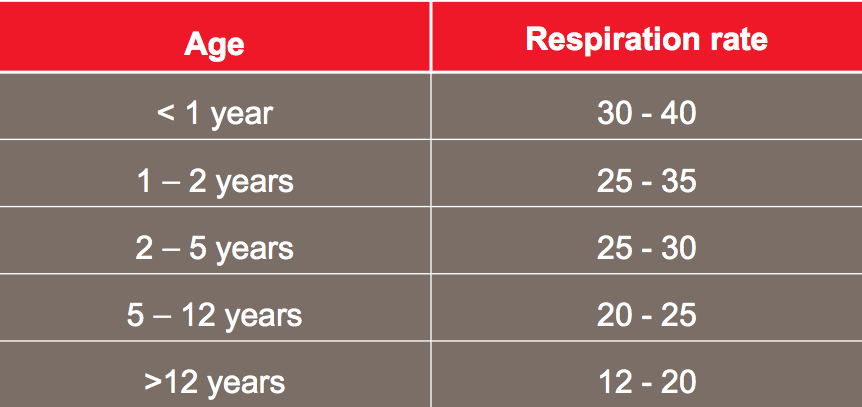

In [8]:
data_csv_2 = pd.read_csv("./Data_example_2.csv")

In [9]:
data_csv_2.head(5)

,num,Order date,ID,Name,Order,Age,Respiration rate
0,1,2021-10-12,P803165,a,j,56,18
1,2,2021-10-12,P803384,b,k,44,15
2,3,2021-10-13,P805062,c,l,67,17
3,4,2021-10-13,P813347,d,m,12,24
4,5,2021-10-13,P813449,e,n,20,23


Respiration rate를 보고 판단하는 함수를 만들어 보자.

In [22]:
normal = []
abnormal = []


def respiration(csv):
    for i in range(a):
        if(csv["Age"][i] <= 1):
            if(int(30 <= csv["Respiration rate"][i]) <= 40):
                normal.append(csv["Name"][i])
            else:
                abnormal.append(csv["Name"][i])
        
        elif(1 < csv["Age"][i] <= 2):
            if(int(25 <= csv["Respiration rate"][i]) <= 35):
                normal.append(csv["Name"][i])
            else:
                abnormal.append(csv["Name"][i])
            
        elif(2 < csv["Age"][i] <= 5):
            if(int(25 <= csv["Respiration rate"][i]) <= 30):
                normal.append(csv["Name"][i])
            else:
                abnormal.append(csv["Name"][i])
            
        elif(5 < csv["Age"][i] <= 12):
            if(int(20 <= csv["Respiration rate"][i]) <= 25):
                normal.append(csv["Name"][i])
            else:
                abnormal.append(csv["Name"][i])
            
        elif(12 < csv["Age"][i]):
            if(int(12 <= csv["Respiration rate"][i]) <= 20):
                normal.append(csv["Name"][i])
            else:
                abnormal.append(csv["Name"][i])

In [23]:
respiration(data_csv_2)

In [24]:
normal

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [21]:
abnormal

[]